In [3]:
from pymodulon.core import *
from pymodulon.plotting import *
from pymodulon.enrichment import *
from pymodulon.compare import *
from pymodulon.io import *
from pymodulon.util import explained_variance

import os
from os import path

from Bio.KEGG import REST
import tqdm.notebook as tqdm

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib_venn import *
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.lines import Line2D

# Import data

In [4]:
ica_data = load_json_model('../data/processed_data/abaum_ica_data.json')

In [5]:
ica_data.imodulon_table

,regulator,pvalue,qvalue,precision,recall,f1score,TP,regulon_size,imodulon_size,n_regs,explained variance,n_genes,Function,Category,Evidence,Name
Fur-1,Fur,1.501639e-20,7.508194e-20,0.365854,0.348837,0.357143,15.0,43.0,41.0,1.0,0.007520,41,Iron homeostasis,Inorganic ions,Fisher's exact test,Fur-1
NDH-1,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015195,9,NADPH dehyrogenase I operon,Energy metabolism,E.coli PRECISE2.0 iModulome comparison,NDH-1
BfmR-BfmS,BfmR-BfmS,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000,6.0,6.0,6.0,1.0,0.002411,6,Two-component system regulating the pili chape...,Virulence,Fisher's exact test,BfmR-BfmS
PhoR-PhoB,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004925,20,Two-component system regulating inorganic phos...,Inorganic ions,E.coli PRECISE2.0 iModulome comparison,PhoR-PhoB
Fur-2,Fur,3.853864e-26,1.541546e-25,0.365385,0.441860,0.400000,19.0,43.0,52.0,1.0,0.020674,52,Iron homeostasis,Inorganic ions,"Fisher's exact test, E.coli PRECISE2.0 iModulo...",Fur-2
Pnt,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004305,3,Pnt operon encoding subunits of NADP transhydr...,Energy metabolism,Manual annotation,Pnt
GigA-GigB KO,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001633,2,Single gene iModulon capturing gigA and gigB k...,Genomic,Manual annotation,GigA-GigB KO
Cbl/GigC,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016704,27,Sulfur transport and cysteine metabolism,Inorganic ions,Manual annotation,Cbl/GigC
R7 mutant,AbaM,5.680000e-08,5.680000e-08,0.169492,0.142857,0.155039,10.0,70.0,59.0,1.0,0.011960,59,iModulon capturing the loss of the p1AB5075 pl...,Plasmid,Manual annotation,R7 mutant
ABUW_1645,ABUW_1645,2.987707e-16,0.000000e+00,0.583333,0.120690,0.200000,14.0,116.0,24.0,1.0,0.032379,24,Key regulator of the VIR-O/AV-T high frequency...,Virulence,Manual annotation,ABUW_1645


In [30]:
ica_data.view_imodulon('GacA-GacS')

,gene_weight,gene_name,old_locus_tag,start,stop,strand,gene_product,COG,uniprot,regulator,accession,ncbi_protein,new_locus_tag,new_accession,operon
ABUW_0628,0.070794,ABUW_0628,NaN,629273,629914,-,peroxidase,"Post-translational modification, protein turno...",NaN,ABUW_1645,CP008706.1,AKA30398.1,ABUW_RS03090,NZ_CP008706.1,Op327
ABUW_1286,0.104386,ABUW_1286,NaN,1306188,1306541,+,hypothetical protein,No COG annotation,NaN,ABUW_1645,CP008706.1,AKA31034.1,ABUW_RS06270,NZ_CP008706.1,Op681
ABUW_1466,0.147799,ABUW_1466,NaN,1456445,1456678,-,hypothetical protein,Function unknown,NaN,"Fur,AbaM,ABUW_1645",CP008706.1,AKA31206.1,ABUW_RS07145,NZ_CP008706.1,None
ABUW_1467,0.118037,ABUW_1467,NaN,1456962,1457951,+,acyl-CoA dehydrogenase,Lipid transport and metabolism,NaN,ABUW_1645,CP008706.1,AKA31207.1,ABUW_RS07150,NZ_CP008706.1,Op755
ABUW_1468,0.117281,ABUW_1468,NaN,1457939,1458733,+,LmbE-like protein,Cell wall/membrane/envelope biogenesis,NaN,NaN,CP008706.1,AKA31208.1,ABUW_RS07155,NZ_CP008706.1,Op755
ABUW_1469,0.108095,ABUW_1469,NaN,1458708,1459307,+,methyltransferase type 12,"Translation, ribosomal structure and biogenesis",NaN,NaN,CP008706.1,AKA31209.1,ABUW_RS07160,NZ_CP008706.1,Op756
ABUW_1470,0.109804,ABUW_1470,NaN,1459304,1459948,+,glycosyl transferase%2C family 2,Cell wall/membrane/envelope biogenesis,NaN,NaN,CP008706.1,AKA31210.1,ABUW_RS07165,NZ_CP008706.1,Op756
ABUW_1471,0.112720,ABUW_1471,NaN,1460237,1460599,+,hypothetical protein,Function unknown,NaN,ABUW_1645,CP008706.1,AKA31211.1,ABUW_RS07170,NZ_CP008706.1,Op757
ABUW_1495,-0.061155,ABUW_1495,NaN,1481619,1481855,-,hypothetical protein,No COG annotation,NaN,NaN,CP008706.1,AKA31235.1,ABUW_RS20505,NZ_CP008706.1,None
ABUW_1631,0.104917,ABUW_1631,NaN,1628562,1629092,+,hypothetical protein,Function unknown,NaN,ABUW_1645,CP008706.1,AKA31369.1,ABUW_RS07960,NZ_CP008706.1,Op840


# Comparing DEGs between VIR-O and AV-T to ABUW_1645 and GacA-GacS iModulons

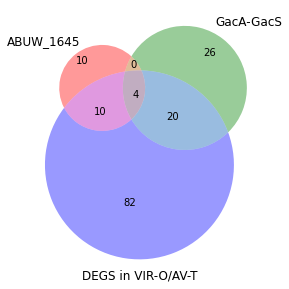

In [16]:
# Visualize Fur iModulons/Regulons with Venn Diagram
fig,ax = plt.subplots(figsize=[5,5])
A1645_imod = set(ica_data.view_imodulon("ABUW_1645").index)
gacAS_imod = set(ica_data.view_imodulon("GacA-GacS").index)
A1645_reg = set(ica_data.trn.loc[ica_data.trn["regulator"]=="ABUW_1645"].gene_id)
venn3([A1645_imod, gacAS_imod, A1645_reg],["ABUW_1645","GacA-GacS", 'DEGS in VIR-O/AV-T'])

#plt.savefig("../figures/Figure4_Venn02.svg",transparent=True)

/Users/nitasha/Documents/MacBook/PhD/AB_Project/Modulome/GitHub/pymodulon/src/pymodulon/plotting.py:1009: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  component_genes = component_genes_x & component_genes_y


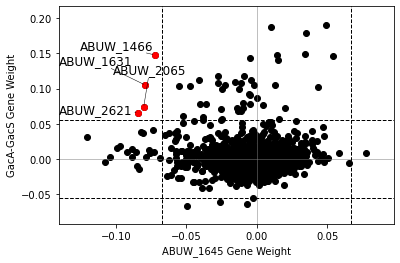

In [45]:
compare_gene_weights(ica_data, 'ABUW_1645', 'GacA-GacS', colors='black')
#plt.savefig("../figures/SuppFigure2d.svg",transparent=True)

# ABUW_1645 vs. GacA-GacS activity

<AxesSubplot:xlabel='ABUW_1645 iModulon Activity', ylabel='GacA-GacS iModulon Activity'>

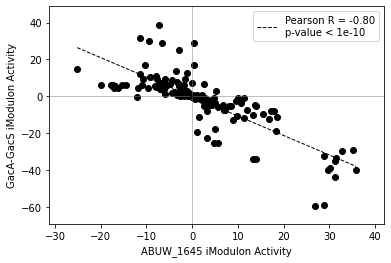

In [5]:
compare_activities(ica_data, 'ABUW_1645', 'GacA-GacS', colors='black')